In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('chemical_process_yield_extended_dataset.csv')

In [3]:
df.head()

,Temperature,Pressure,Catalyst_Concentration,Feed_Composition,Reaction_Time,Reactor_Volume,Cooling_Rate,Agitation_Speed,Yield
0,374.835708,241.980663,0.466396,0.620968,6.602569,907.961859,17.234114,478.421287,313.876679
1,343.086785,227.739010,0.159409,0.725363,5.906181,1029.436141,18.730241,382.223854,292.965719
2,382.384427,201.788911,0.413938,0.821522,8.455458,1081.868007,16.230689,646.978426,316.988469
3,426.151493,180.591897,0.199898,0.554859,2.780834,674.264289,21.913268,437.772978,257.760656
4,338.292331,220.946699,0.827412,0.732280,6.888850,998.783020,25.624663,315.973362,315.616697


In [4]:
df.columns

Index(['Temperature', 'Pressure', 'Catalyst_Concentration', 'Feed_Composition',
       'Reaction_Time', 'Reactor_Volume', 'Cooling_Rate', 'Agitation_Speed',
       'Yield'],
      dtype='object')

In [5]:
#Independent and dependent features
X = df.drop('Yield' , axis =1)
y = df['Yield']

In [6]:
X.head()

,Temperature,Pressure,Catalyst_Concentration,Feed_Composition,Reaction_Time,Reactor_Volume,Cooling_Rate,Agitation_Speed
0,374.835708,241.980663,0.466396,0.620968,6.602569,907.961859,17.234114,478.421287
1,343.086785,227.739010,0.159409,0.725363,5.906181,1029.436141,18.730241,382.223854
2,382.384427,201.788911,0.413938,0.821522,8.455458,1081.868007,16.230689,646.978426
3,426.151493,180.591897,0.199898,0.554859,2.780834,674.264289,21.913268,437.772978
4,338.292331,220.946699,0.827412,0.732280,6.888850,998.783020,25.624663,315.973362


In [7]:
y


0      313.876679
1      292.965719
2      316.988469
3      257.760656
4      315.616697
          ...    
995    304.884136
996    333.676190
997    271.620944
998    244.665891
999    257.288644
Name: Yield, Length: 1000, dtype: float64

In [8]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25 , random_state=42)

In [9]:
X_train.shape , X_test.shape

((750, 8), (250, 8))

In [10]:
# Feature Scaling or Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
X_train_scaled

array([[ 1.47061167, -0.41411426,  0.46413786, ...,  0.48656715,
        -0.5908791 ,  0.38884044],
       [-2.134993  ,  0.67109805, -1.49409161, ...,  1.04210629,
         0.28649036,  0.67143319],
       [-1.74491771,  1.26231609,  0.89690983, ..., -0.57517851,
         0.11541639,  0.41540106],
       ...,
       [ 0.16449629, -0.2251712 , -0.87953222, ..., -0.45719042,
        -0.22625964, -0.39483987],
       [ 0.03252109,  0.1953155 ,  1.09753476, ..., -1.26846266,
         0.1593035 ,  0.41769674],
       [-0.39446982,  2.01669541, -0.99154758, ...,  0.96867152,
         0.3722409 , -0.18616763]])

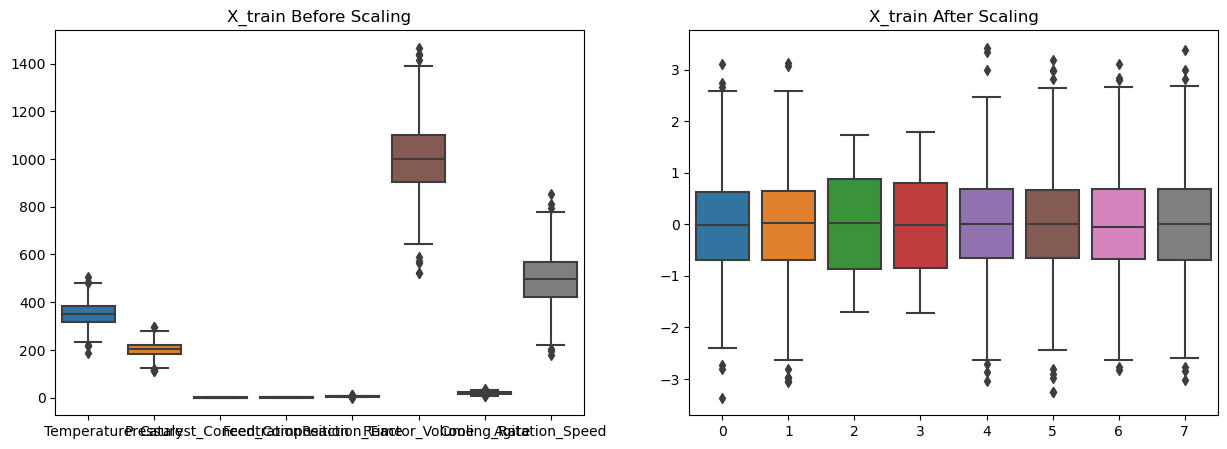

In [13]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data = X_train)
plt.title('X_train Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data = X_train_scaled)
plt.title('X_train After Scaling')
plt.show()

Mean absolute error  4.208136274965612
R2 Score 0.9614232753667857


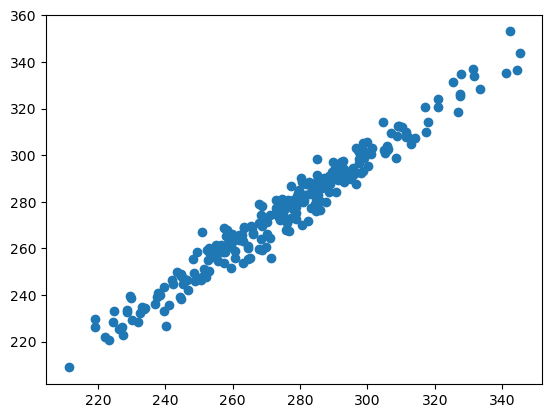

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg = LinearRegression()
linreg.fit(X_train_scaled , y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error ", mae)
print("R2 Score", score)
plt.scatter(y_test , y_pred)
plt.show()

Mean absolute error 4.606821923824676
R2 Score 0.9538608664924966


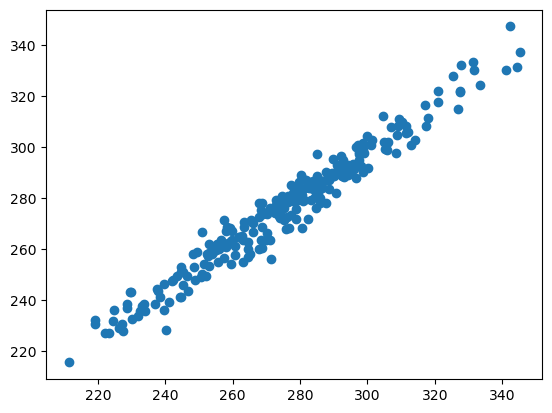

In [15]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import  r2_score
lasso = Lasso()
lasso.fit(X_train_scaled , y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error" , mae)
print("R2 Score" , score)
plt.scatter(y_test , y_pred)
plt.show()

Mean absolut=e error 4.202823195081239
R2 Score 0.9615633602142629


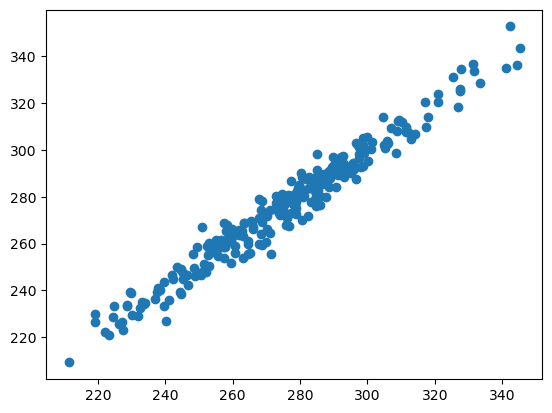

In [16]:
# CROSS VALIDATION LASSO
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv = 5)
lassocv.fit(X_train_scaled,y_train)
y_pred = lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae = mean_absolute_error(y_test , y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolut=e error" , mae)
print("R2 Score" , score)

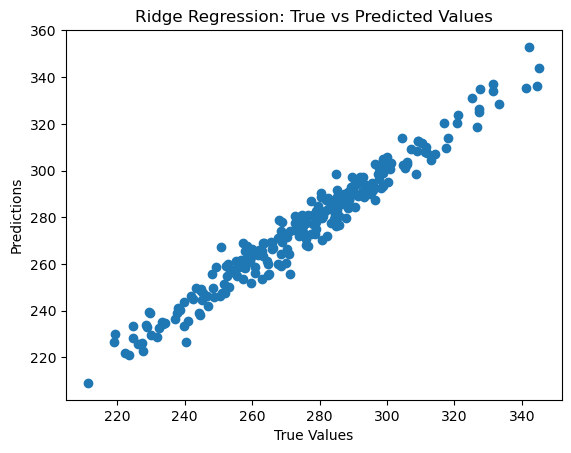

Mean Absolute Error: 4.207855491639415
R2 Score: 0.9614450093249177


In [17]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Instantiate the Ridge regression model
ridge = Ridge(alpha=1.0)  # Adjust alpha for regularization strength

# Fit the model to the training data
ridge.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = ridge.predict(X_test_scaled)

# Scatter plot of true vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Ridge Regression: True vs Predicted Values')
plt.show()

# Calculate and print the evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("R2 Score:", score)


Mean absolute error 4.207855491639415
R2 Score 0.9614450093249177


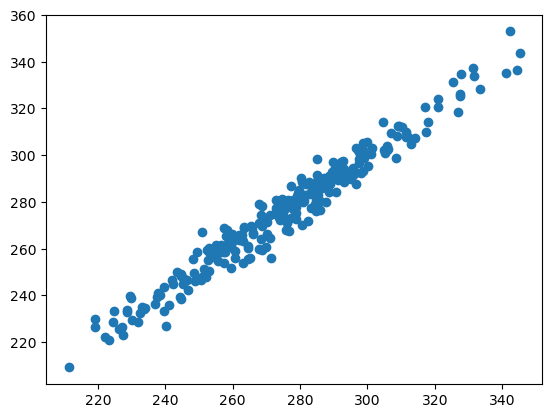

In [18]:
# cv RIDGE REGRESSION MODEL
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 4.218173790899491
R2 Score 0.9614694494887377


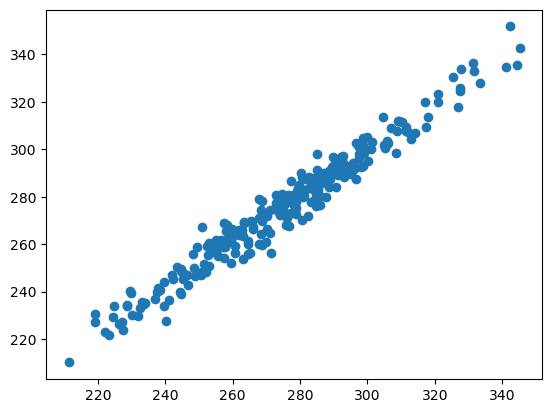

In [19]:
# ElasticNetCV Regression model
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,y_train)
y_pred=elasticcv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [26]:
## pickle the machine learning models , preprocessing model standardcsaler

In [20]:
scaler

StandardScaler()

In [21]:
ridge

Ridge()

In [22]:
import pickle
pickle.dump(scaler,open('scaler.pkl', 'wb'))
pickle.dump(ridge,open('ridge.pkl', 'wb'))
